### Introduction to Plotly

A great tool for data visualization is called [Plotly](https://plot.ly/).  Let's get started.

We download Plotly with the following command.

In [ ]:
!pip install plotly

> Press shift enter to run the above line of code.

<img src="plotly-two-traces.png" width="60%"> 

### Understanding the components of our plot

Now plotly can make graphs like the one below.

Imagine that the this graph above is used to show the amount of money earned in the first, second, third and fourth month for a restaurant chain.  And imagine that the orange line represents the amount of money earned by a restaurant in Dallas TX, and the blue line represents the amount of money earned by the restaurant in Houston.  So this entire graph shows how the two restaurants are doing side by side.

Now let's refer to the components of the graph the way that plotly does.   Plotly calls each of those blue and orange lines a **`trace`**.  We can have as many traces as we want, just as our restaurant chain could potentially have many more restaurants and we want a line for each.  Second, plotly calls that entire graph above a `figure`.  

So, the takeaway here is that **a figure consists of a list of traces.**

### Building those components in code

Ok, now it's time to use plotly.  We already downloaded it with pip, so now we need to import it.  We do so with the following lines.

In [1]:
import plotly
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

You'll notice that we imported the `iplot` method from the `plotly.offline`.  Let's use it to make our first figure, and then we'll try to understand this code better below.

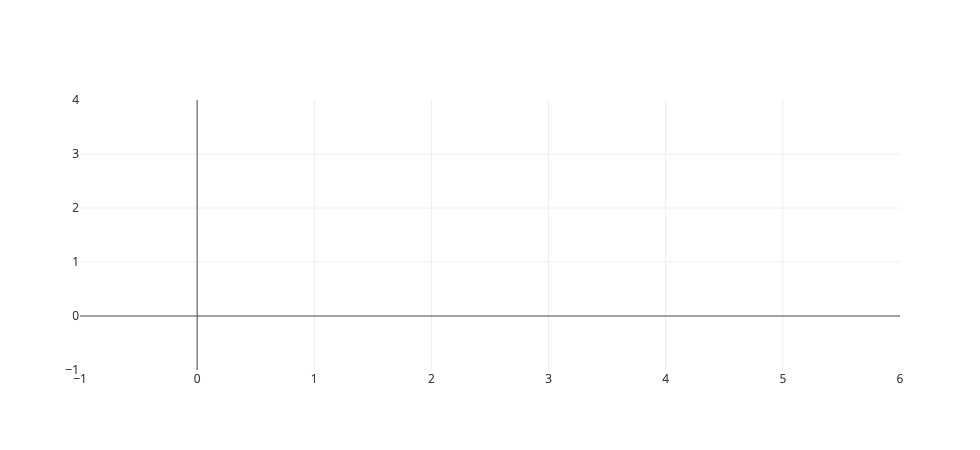

In [2]:
iplot([{}])

Ah yes, an empty graph.  Let's look at the code again to make sense of it.

```python
iplot([
    {}
])

```

Remember our takeaway from above, **a figure is a list of traces**.  So that list right after the parentheses is our *figure* and the dictionary is a trace.  Because that dictionary is empty we don't see any lines on the screen.

Let's change that.  We still need our figure, but this time inside of the figure, we'll use a trace with some data. This is the our new code.

```python
trace =  {'x': [0, 1, 2, 3, 4], 'y': [0, 4, 8, 12, 16]}
iplot([
   trace
])
```

As we can see, the trace variable is just a dictionary with keys `'x'` and `'y'`.  The `x` key points to a list of each of the x cooridinates for the corresponding points and the `y` key points to a list of the `y` coordinates.  

Now let's create a figure with two traces.  This is easy enough.  Each trace is a dictionary.  And we make each trace an element in our list (which is for our figure).  This makes sense, as our figure is a list of traces.


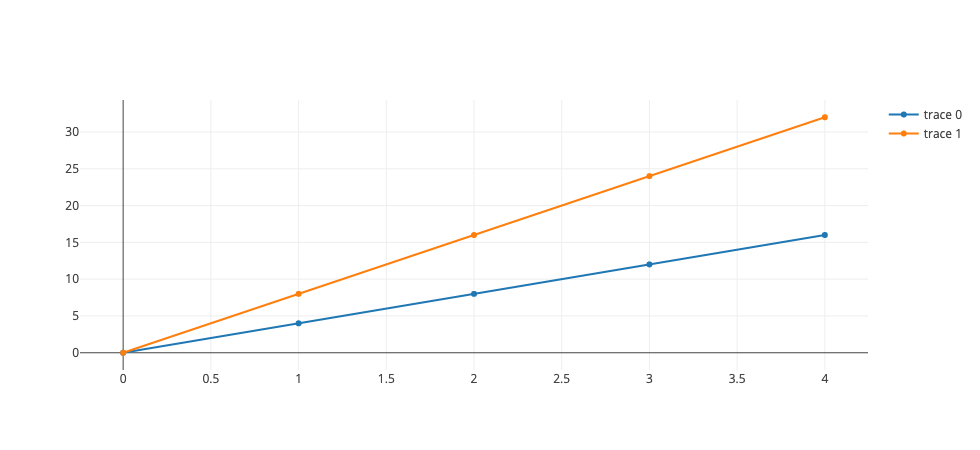

In [6]:
first_trace =  {'x': [0, 1, 2, 3, 4], 'y': [0, 4, 8, 12, 16]}
second_trace =  {'x': [0, 1, 2, 3, 4], 'y': [0, 8, 16, 24, 32]}

iplot([
   first_trace, second_trace
])

Plotly connects each of our datapoints with a line by default.  However, if we want to just show the markers, we specify this in our trace dictionary with setting a key of `'mode'` equal to the value `'markers'`.

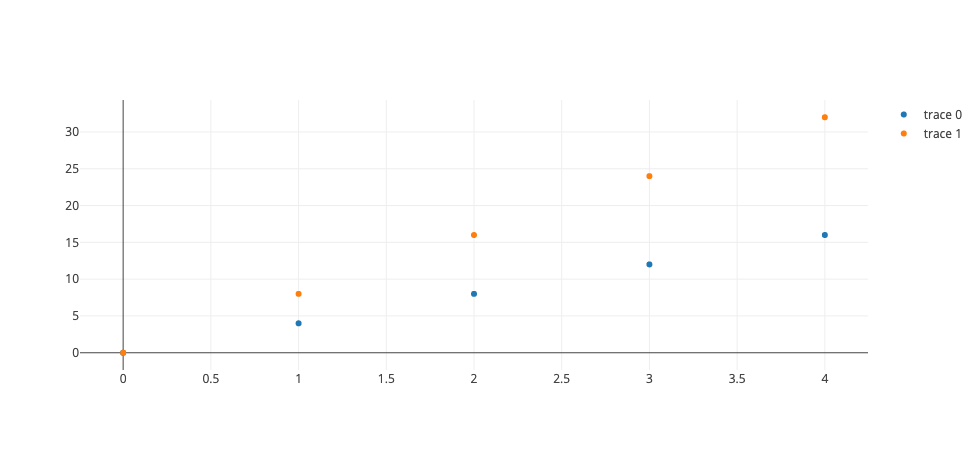

In [24]:
first_trace =  {'x': [0, 1, 2, 3, 4], 'y': [0, 4, 8, 12, 16], 'mode': 'markers'}
second_trace =  {'x': [0, 1, 2, 3, 4], 'y': [0, 8, 16, 24, 32], 'mode': 'markers'}
iplot([
   first_trace, second_trace
])

### Plotting our Revenue Data

Ok, now let's try to plot some of our restaurant revenue data from Max's.  First, we can load the data with the following.

In [4]:
import json
with open('max-revenue.json') as file:
    revenues = json.load(file)

Now we have our revenue data.  Let's take a quick look at it again.

In [5]:
len(revenues)

25

In [6]:
revenues[0:3]

[{'total_receipts': 56182, 'end_date': '2016-12-31T00:00:00.000'},
 {'total_receipts': 9400, 'end_date': '2017-08-31T00:00:00.000'},
 {'total_receipts': 50574, 'end_date': '2016-06-30T00:00:00.000'}]

Ok, so each dictionary has the total receipts and the `end_date`.  Our goal here is to plot the revenue data per month.  The problem we have is that our data is completely out of order.

> The data above is not in a perfect format.  It's a string, but it represents a `datetime` which is yet another data type.  Technically we should convert these strings to a datetime format and then sort the dates.  However leaving them as strings and sorting them will work because strings will sort with smaller numbers before larger numbers.

We can do so using the `sorted` method.

In [16]:
sorted_by_date = sorted(revenues, key = lambda revenue: revenue['end_date'])
sorted_by_date[0:3]

[{'total_receipts': 0, 'end_date': '2015-08-31T00:00:00.000'},
 {'total_receipts': 66609, 'end_date': '2015-09-30T00:00:00.000'},
 {'total_receipts': 67048, 'end_date': '2015-10-31T00:00:00.000'}]

Now that data is sorted by date, we just create the list of dates for our x values, and the total receipts for the y values.

In [18]:
dates = list(map(lambda revenue: revenue['end_date'], revenues))
revenues = list(map(lambda revenue: revenue['total_receipts'], revenues))

Finally, we create a plot by creating a trace with an `x` key of dates, and a `y` key of revenues, and setting the `mode` to `'markers'` so that there is no line connecting the data.

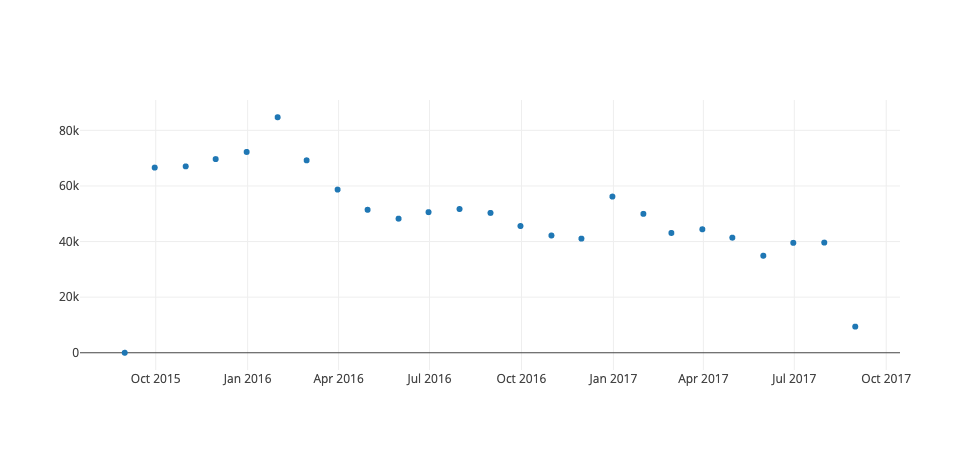

In [19]:
iplot([{'x': dates, 'y': revenues, 'mode': 'markers'}])

### Summary

In this lesson, we worked with the `plotly` library to plot our data.  A fundamental concept is that a figure is just a list of traces.  So when we plot our data we pass a list into the `iplot` method, and pass the traces we wish to display.  A trace is represented as a dictionary with an `x` key pointing a list of the `x` coordinates for each point and a `y` key pointing to a list of the `y` coordinates for each point.

```python

first_trace =  {'x': [0, 1, 2, 3, 4], 'y': [0, 4, 8, 12, 16], 'mode': 'markers'}
second_trace =  {'x': [0, 1, 2, 3, 4], 'y': [0, 8, 16, 24, 32], 'mode': 'markers'}
iplot([
   first_trace, second_trace
])

```